## LOGISTICS REGRESSION ASSIGNMENT

In [54]:
# import numpy as np
# import pandas as pd
# import statsmodels.api as sm
# import matplotlib.pyplot as plt
# from patsy import dmatrices
# from sklearn.linear_model import LogisticRegression 
# from sklearn.model_selection import train_test_split 
# from sklearn import metrics 
# from sklearn.model_selection import cross_val_score
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [6]:
data = sm.datasets.fair.load_pandas().data
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [35]:
data.isna().sum() # check null values

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [8]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


In [20]:
# data['affairs']=(data.affairs>0).astype(int)
data['affairs'].value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [14]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


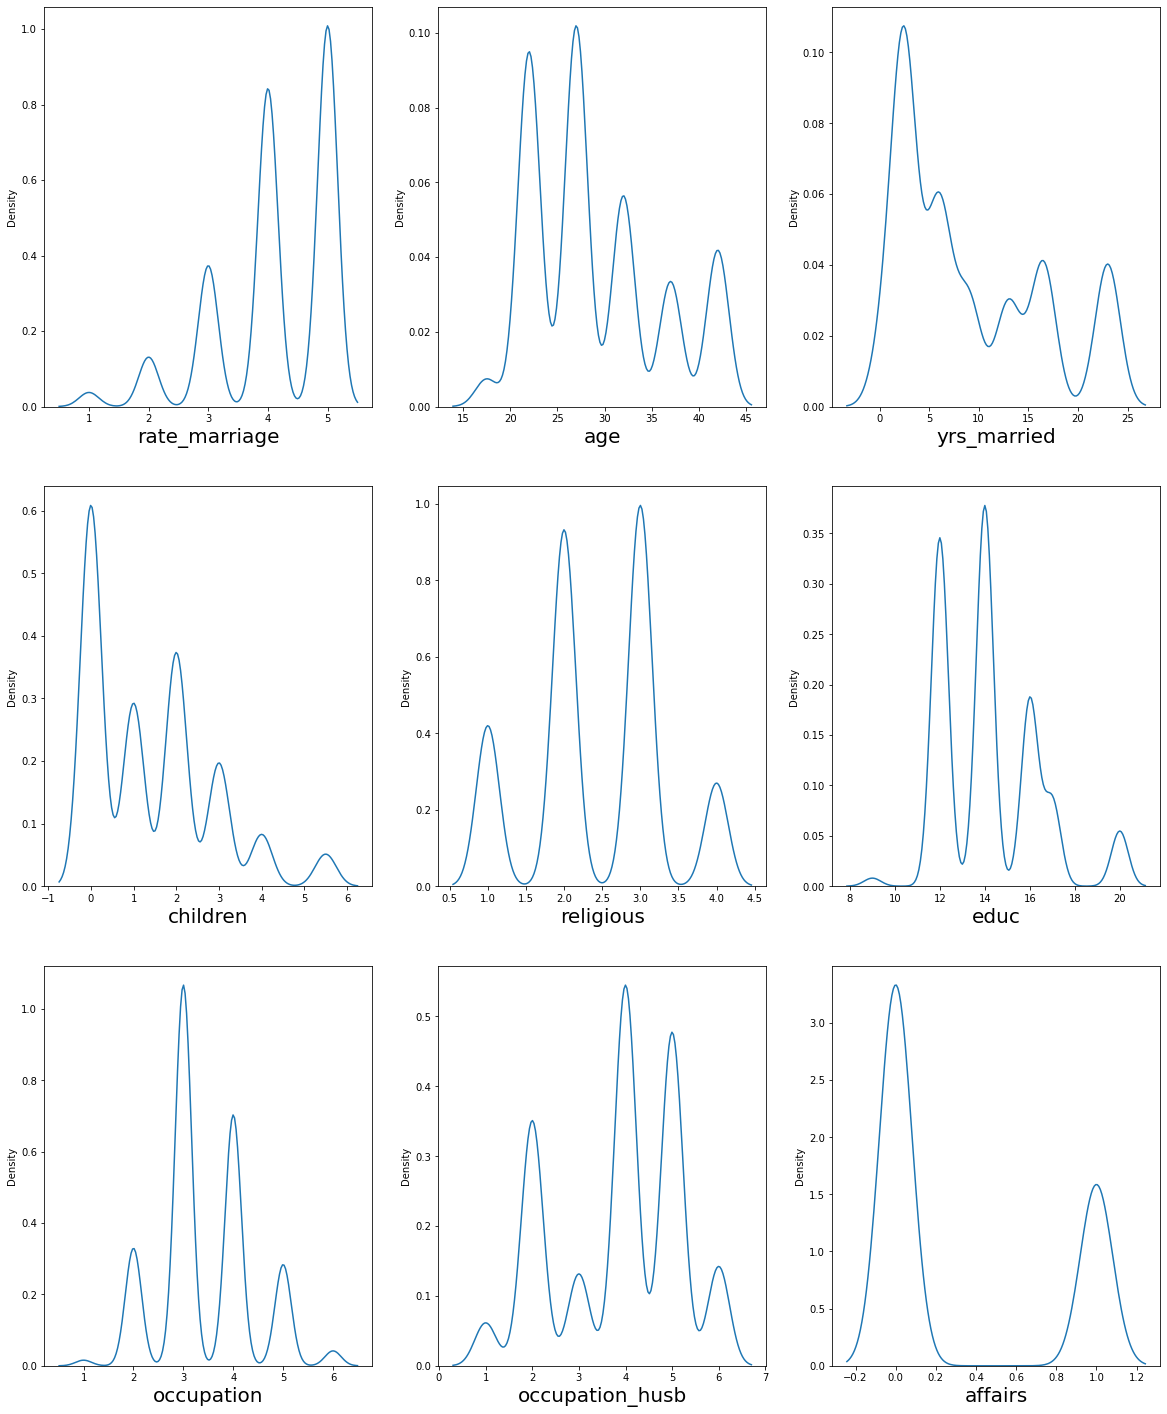

In [30]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.kdeplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

##### lets check for skewnwss here.
##### Note: 
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed


In [39]:
data.skew(axis=0)

rate_marriage     -1.009710
age                0.576149
yrs_married        0.725854
children           0.890980
religious         -0.028350
educ               0.794714
occupation         0.343946
occupation_husb   -0.380442
affairs            0.759673
dtype: float64

In [41]:
X = data.drop('affairs', axis=1)
y= data['affairs']

##### So this is fine as there is no high skewness in the data

#### let's visualize the relationship between our independent variables and the categories

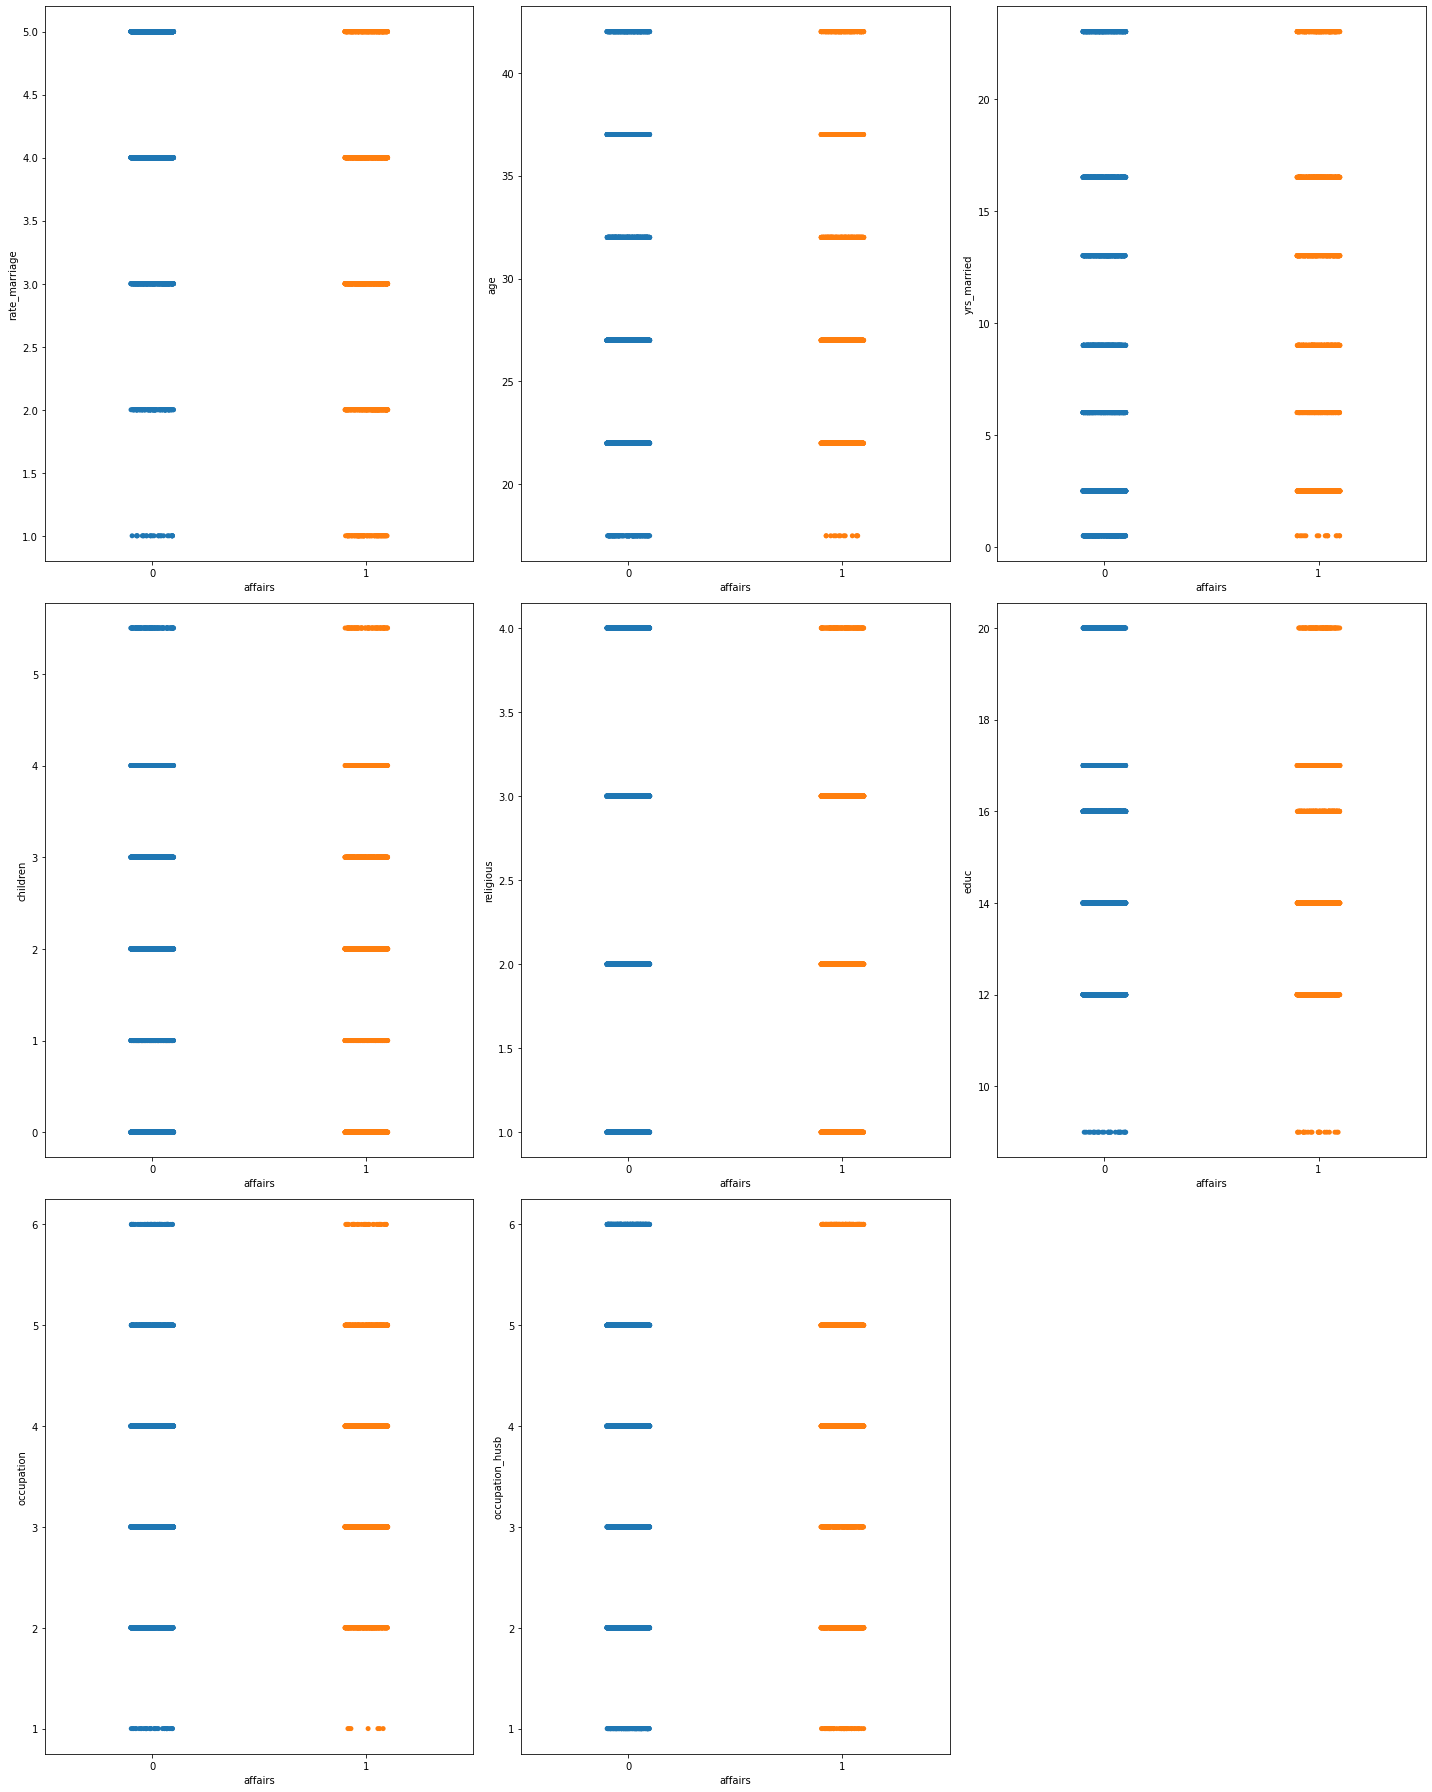

In [47]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y=X[column], x=y )
    plotnumber+=1
plt.tight_layout()

Great!! Let's proceed by checking multicollinearity in the dependent variables.
Before that, we should scale our data. Let's use the standard scaler for that.


In [97]:
from sklearn.preprocessing import StandardScaler 

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [98]:
X_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [99]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.034798,rate_marriage
1,5.454116,age
2,7.142949,yrs_married
3,2.528972,children
4,1.036906,religious
5,1.296242,educ
6,1.206863,occupation
7,1.082876,occupation_husb


As expected, the women age and years of marriage have a high variance inflation factor because they "explain" the same variance within this dataset. We would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

Here we will drop the "age" column

In [104]:
X = X.drop('age',axis=1)

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)


In [106]:
X_scaled.shape

(6366, 7)

In [107]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

### lets fit the model


In [108]:
# lets fit the mode;
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

### Let's see how well our model performs on the test data set.

In [109]:
y_pred = log_reg.predict(x_test)

In [112]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7141959798994975

In [113]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[969, 115],
       [340, 168]], dtype=int64)

In [121]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [122]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8939114391143912

In [123]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7402597402597403

In [124]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8098620977852069

In [125]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.612310050265857

In [126]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

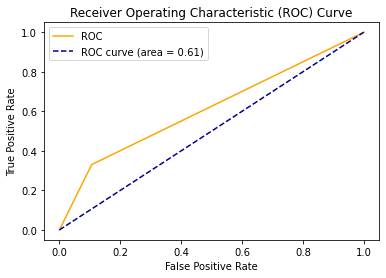

In [127]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### Conclusion

we can say the mode did a good job in predicting the outcomes

the F1 score shows that about 80% of the classes flunctuations are explained by the model